# 1.  Decision Tree Algorithms
Data Source: https://www.kaggle.com/uciml/faulty-steel-plates

Dataset provided by Semeion, Research Center of Sciences of Communication, Via Sersale 117, 00128, Rome, Italy. www.semeion.it

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately describe the geometric shape of the defect and its outline. 

There are 1941 plates with 34 variables. The first 27 columns (i.e. independent variables) describe some kind of steel plate faults seen in images, i.e., X1-X27, as 

{X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter,
Y_Perimeter, SumofLuminosity, MinimumofLuminosity, MaximumofLuminosity, LengthofConveyer, TypeOfSteel_A300, TypeOfSteel_A400, SteelPlateThickness, Edges_Index,Empty_Index, Square_Index, OutsideXIndex, EdgesXIndex, EdgesYIndex, OutsideGlobalIndex, LogOfAreas, LogXIndex, LogYIndex, Orientation_Index, Luminosity_Index, SigmoidOfAreas}


The last seven columns (i.e. dependent variables) are one hot encoded classes, i.e. if the plate fault is classified as "Stains" there will be a 1 in that column and 0's in the other columns.

{Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults}

These data can be found in http://archive.ics.uci.edu/ml/datasets/steel+plates+faults, and are
attached in the file MDS_Assignment3_Steelplates.xlsx.

## Questions

(a) (5%) Construct a data science framework and show the data summary

Data Science Framework

* Problem definition: 
   * Correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other")
* Data Analysis: 
  * Data Preparation
    * Data Cleaning
    * Check Data Quality
    * Remove Redundant Column
  * Data Balancing
* Modeling
  * Model Structuring
    * CART
    * Random Forest
    * GBDT
  * Model Assessing
    * Cross Validation
* Decision Support: 
  * Model Criticism
  * Knowledge Management

Data Summary

1. Except for nominal variables like {TypeOfSteel_A300, TypeOfSteel_A400, , Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults}, all variables are numerical
2. The Summary of data is shown in the table below

|       |   X_Minimum |   X_Maximum |        Y_Minimum |        Y_Maximum |   Pixels_Areas |   X_Perimeter |   Y_Perimeter |   Sum_of_Luminosity |
|:------|------------:|------------:|-----------------:|-----------------:|---------------:|--------------:|--------------:|--------------------:|
| count |    1941     |    1941     |   1941           |   1941           |        1941    |      1941     |      1941     |      1941           |
| mean  |     571.136 |     617.964 |      1.65068e+06 |      1.65074e+06 |        1893.88 |       111.855 |        82.966 |    206312           |
| std   |     520.691 |     497.627 |      1.77458e+06 |      1.77459e+06 |        5168.46 |       301.209 |       426.483 |    512294           |
| min   |       0     |       4     |   6712           |   6724           |           2    |         2     |         1     |       250           |
| 25%   |      51     |     192     | 471253           | 471281           |          84    |        15     |        13     |      9522           |
| 50%   |     435     |     467     |      1.20413e+06 |      1.20414e+06 |         174    |        26     |        25     |     19202           |
| 75%   |    1053     |    1072     |      2.18307e+06 |      2.18308e+06 |         822    |        84     |        83     |     83011           |
| max   |    1705     |    1713     |      1.29877e+07 |      1.29877e+07 |      152655    |     10449     |     18152     |         1.15914e+07 |


|       |   Minimum_of_Luminosity |   Maximum_of_Luminosity |   Length_of_Conveyer |   TypeOfSteel_A300 |   TypeOfSteel_A400 |   Steel_Plate_Thickness |
|:------|------------------------:|------------------------:|---------------------:|-------------------:|-------------------:|------------------------:|
| count |               1941      |                1941     |             1941     |        1941        |        1941        |               1941      |
| mean  |                 84.5487 |                 130.194 |             1459.16  |           0.400309 |           0.599691 |                 78.7378 |
| std   |                 32.1343 |                  18.691 |              144.578 |           0.490087 |           0.490087 |                 55.086  |
| min   |                  0      |                  37     |             1227     |           0        |           0        |                 40      |
| 25%   |                 63      |                 124     |             1358     |           0        |           0        |                 40      |
| 50%   |                 90      |                 127     |             1364     |           0        |           1        |                 70      |
| 75%   |                106      |                 140     |             1650     |           1        |           1        |                 80      |
| max   |                203      |                 253     |             1794     |           1        |           1        |                300      |


|       |   Edges_Index |   Empty_Index |   Square_Index |   Outside_X_Index |   Edges_X_Index |   Edges_Y_Index |   Outside_Global_Index |   LogOfAreas |
|:------|--------------:|--------------:|---------------:|------------------:|----------------:|----------------:|-----------------------:|-------------:|
| count |   1941        |   1941        |    1941        |      1941         |     1941        |     1941        |            1941        |   1941       |
| mean  |      0.331715 |      0.414203 |       0.570767 |         0.0333611 |        0.610529 |        0.813472 |               0.575734 |      2.49239 |
| std   |      0.299712 |      0.137261 |       0.271058 |         0.0589612 |        0.243277 |        0.234274 |               0.482352 |      0.78893 |
| min   |      0        |      0        |       0.0083   |         0.0015    |        0.0144   |        0.0484   |               0        |      0.301   |
| 25%   |      0.0604   |      0.3158   |       0.3613   |         0.0066    |        0.4118   |        0.5968   |               0        |      1.9243  |
| 50%   |      0.2273   |      0.4121   |       0.5556   |         0.0101    |        0.6364   |        0.9474   |               1        |      2.2406  |
| 75%   |      0.5738   |      0.5016   |       0.8182   |         0.0235    |        0.8      |        1        |               1        |      2.9149  |
| max   |      0.9952   |      0.9439   |       1        |         0.8759    |        1        |        1        |               1        |      5.1837  |


|       |   Log_X_Index |   Log_Y_Index |   Orientation_Index |   Luminosity_Index |   SigmoidOfAreas |
|:------|--------------:|--------------:|--------------------:|-------------------:|-----------------:|
| count |   1941        |   1941        |        1941         |        1941        |      1941        |
| mean  |      1.33569  |      1.40327  |           0.0832876 |          -0.131305 |         0.58542  |
| std   |      0.481612 |      0.454345 |           0.500868  |           0.148767 |         0.339452 |
| min   |      0.301    |      0        |          -0.991     |          -0.9989   |         0.119    |
| 25%   |      1        |      1.0792   |          -0.3333    |          -0.195    |         0.2482   |
| 50%   |      1.1761   |      1.3222   |           0.0952    |          -0.133    |         0.5063   |
| 75%   |      1.5185   |      1.7324   |           0.5116    |          -0.0666   |         0.9998   |
| max   |      3.0741   |      4.2587   |           0.9917    |           0.6421   |         1        |


|       |       Pastry |    Z_Scratch |    K_Scatch |       Stains |    Dirtiness |       Bumps |   Other_Faults |
|:------|-------------:|-------------:|------------:|-------------:|-------------:|------------:|---------------:|
| count | 1941         | 1941         | 1941        | 1941         | 1941         | 1941        |    1941        |
| mean  |    0.0814013 |    0.0978877 |    0.201443 |    0.0370943 |    0.0283359 |    0.20711  |       0.346728 |
| std   |    0.273521  |    0.297239  |    0.401181 |    0.189042  |    0.165973  |    0.405339 |       0.476051 |
| min   |    0         |    0         |    0        |    0         |    0         |    0        |       0        |
| 25%   |    0         |    0         |    0        |    0         |    0         |    0        |       0        |
| 50%   |    0         |    0         |    0        |    0         |    0         |    0        |       0        |
| 75%   |    0         |    0         |    0        |    0         |    0         |    0        |       1        |
| max   |    1         |    1         |    1        |    1         |    1         |    1        |       1        |

3. Overall Distribution of the data set is shown below, many of columns are not normally distributed, a model that would not be affected by distribution (e.g. Decision Tree) would be preferred.

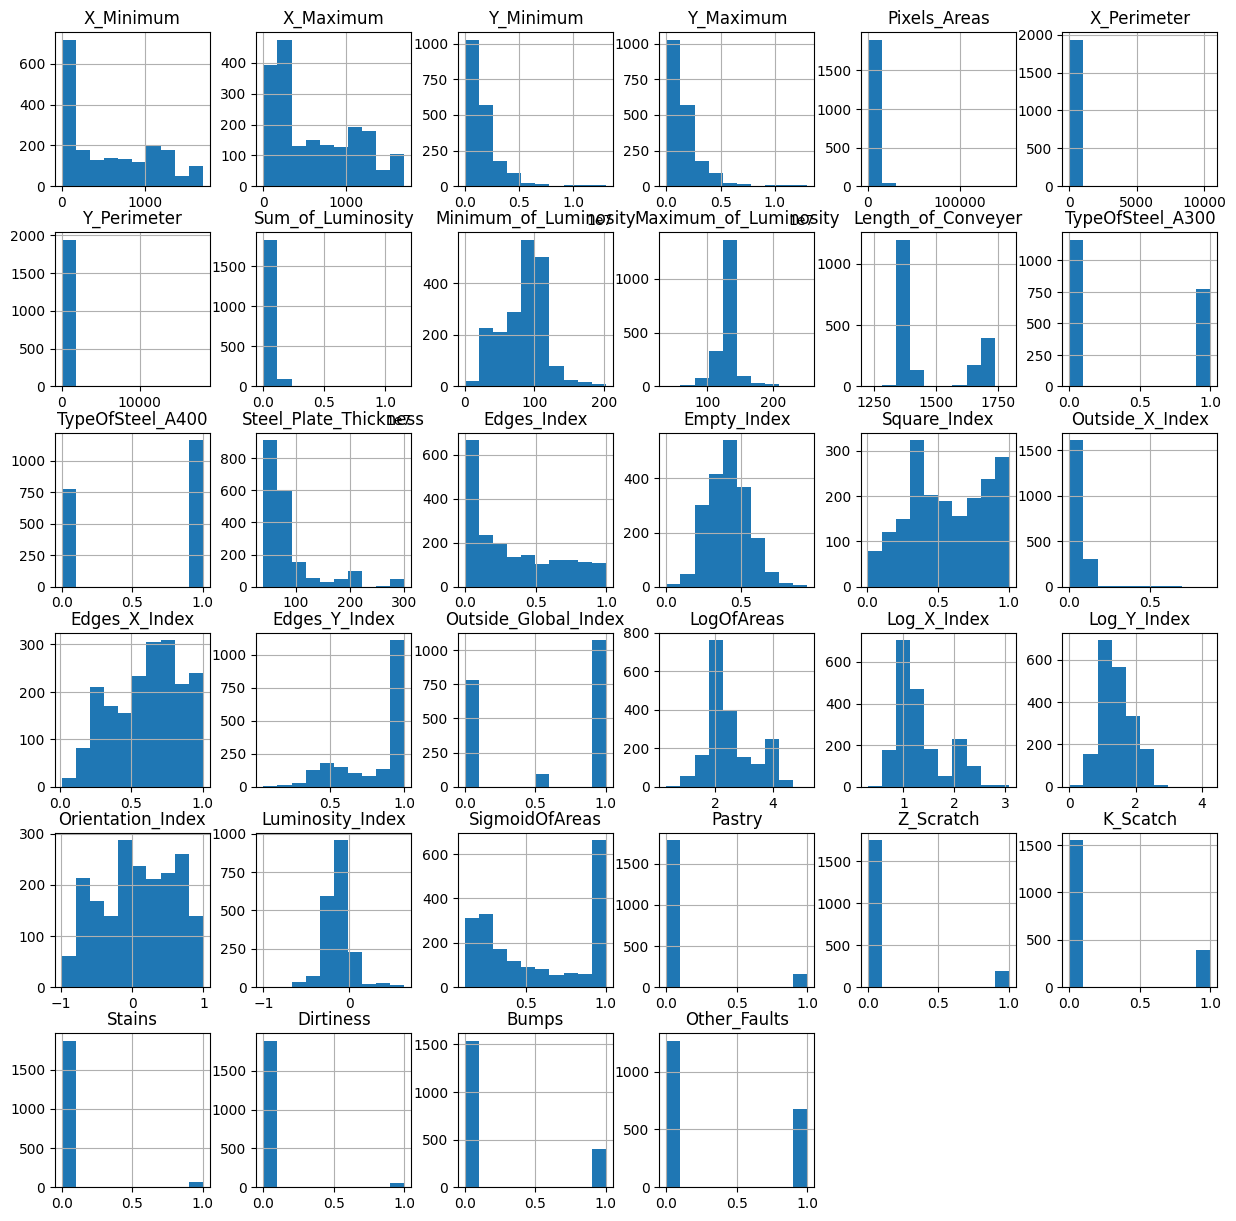

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("MDS_Assignment3_Steelplates.xlsx")
data.hist(layout = (6, 6), figsize=(15, 15))
plt.show()


(b) (5%) What is the problem about the dataset? Any identical column? Any redundant column? Any missing value? How to handle these issues?
* No missing value in this dataset
* Observing the correlation
  * Type of steel: should be combined to one column, since it is actually one-hot encoded.
  * X_min, X_max, Y_min, Y_max: Those are highly correlated between the two pairs.Therefore, it is combined to two columns: mean and relative percent range.
  * For Pixel_Areas, XY_Perimeters, LogofAreas, Log_XY_Index: Those variables are also highly correlated and may have collinearity, but sometimes redundant columns may help the model, and meaning of those variables remain unknown due to lack of domain knowledge. We'll come to it if the model is underperformed.
  * Concat Classes: Combine one-hot encoded y variable into one column in order to fit the model


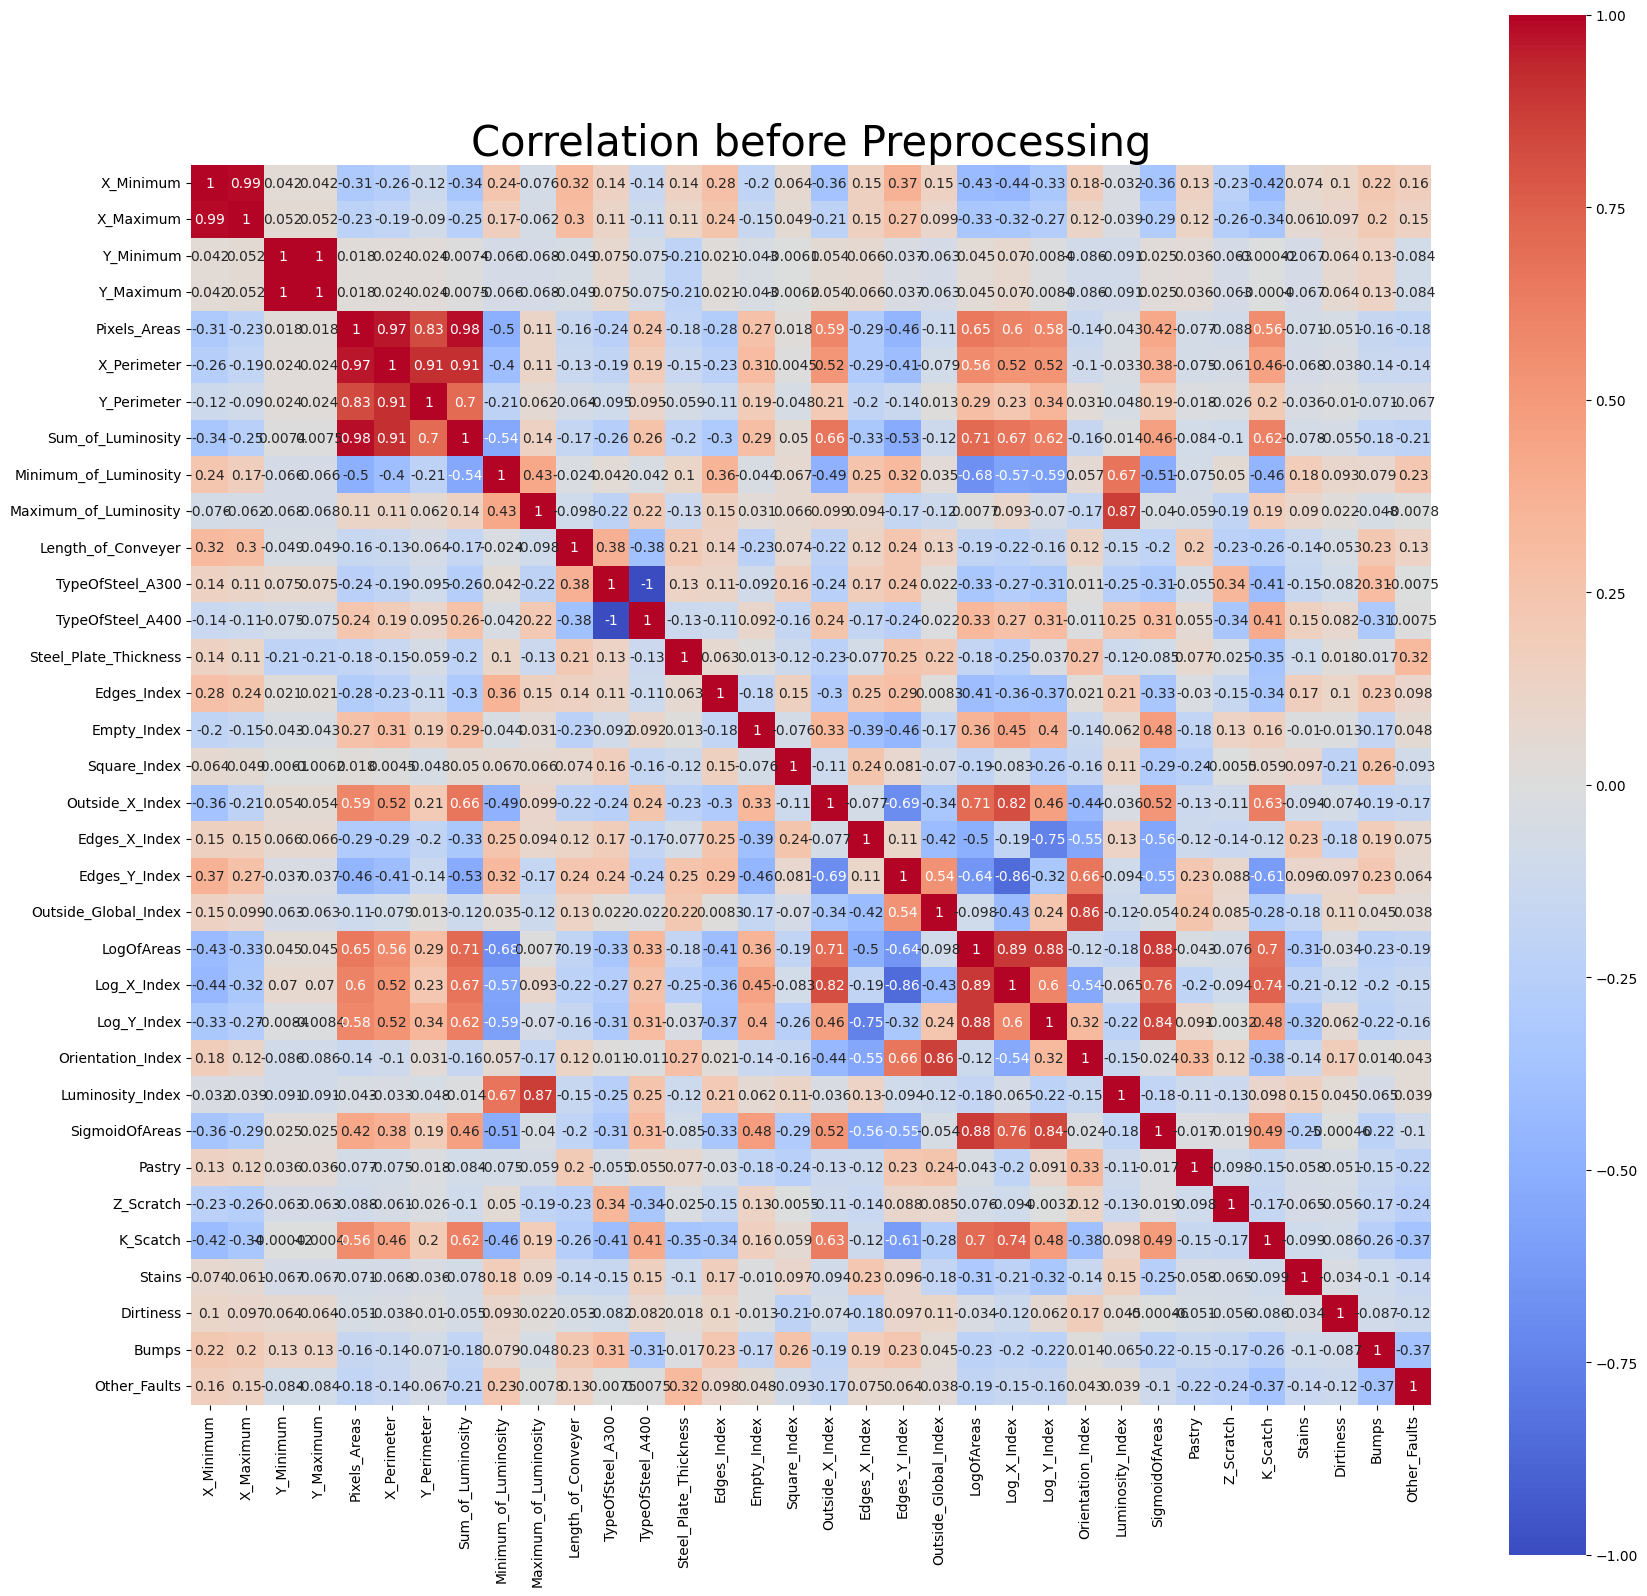

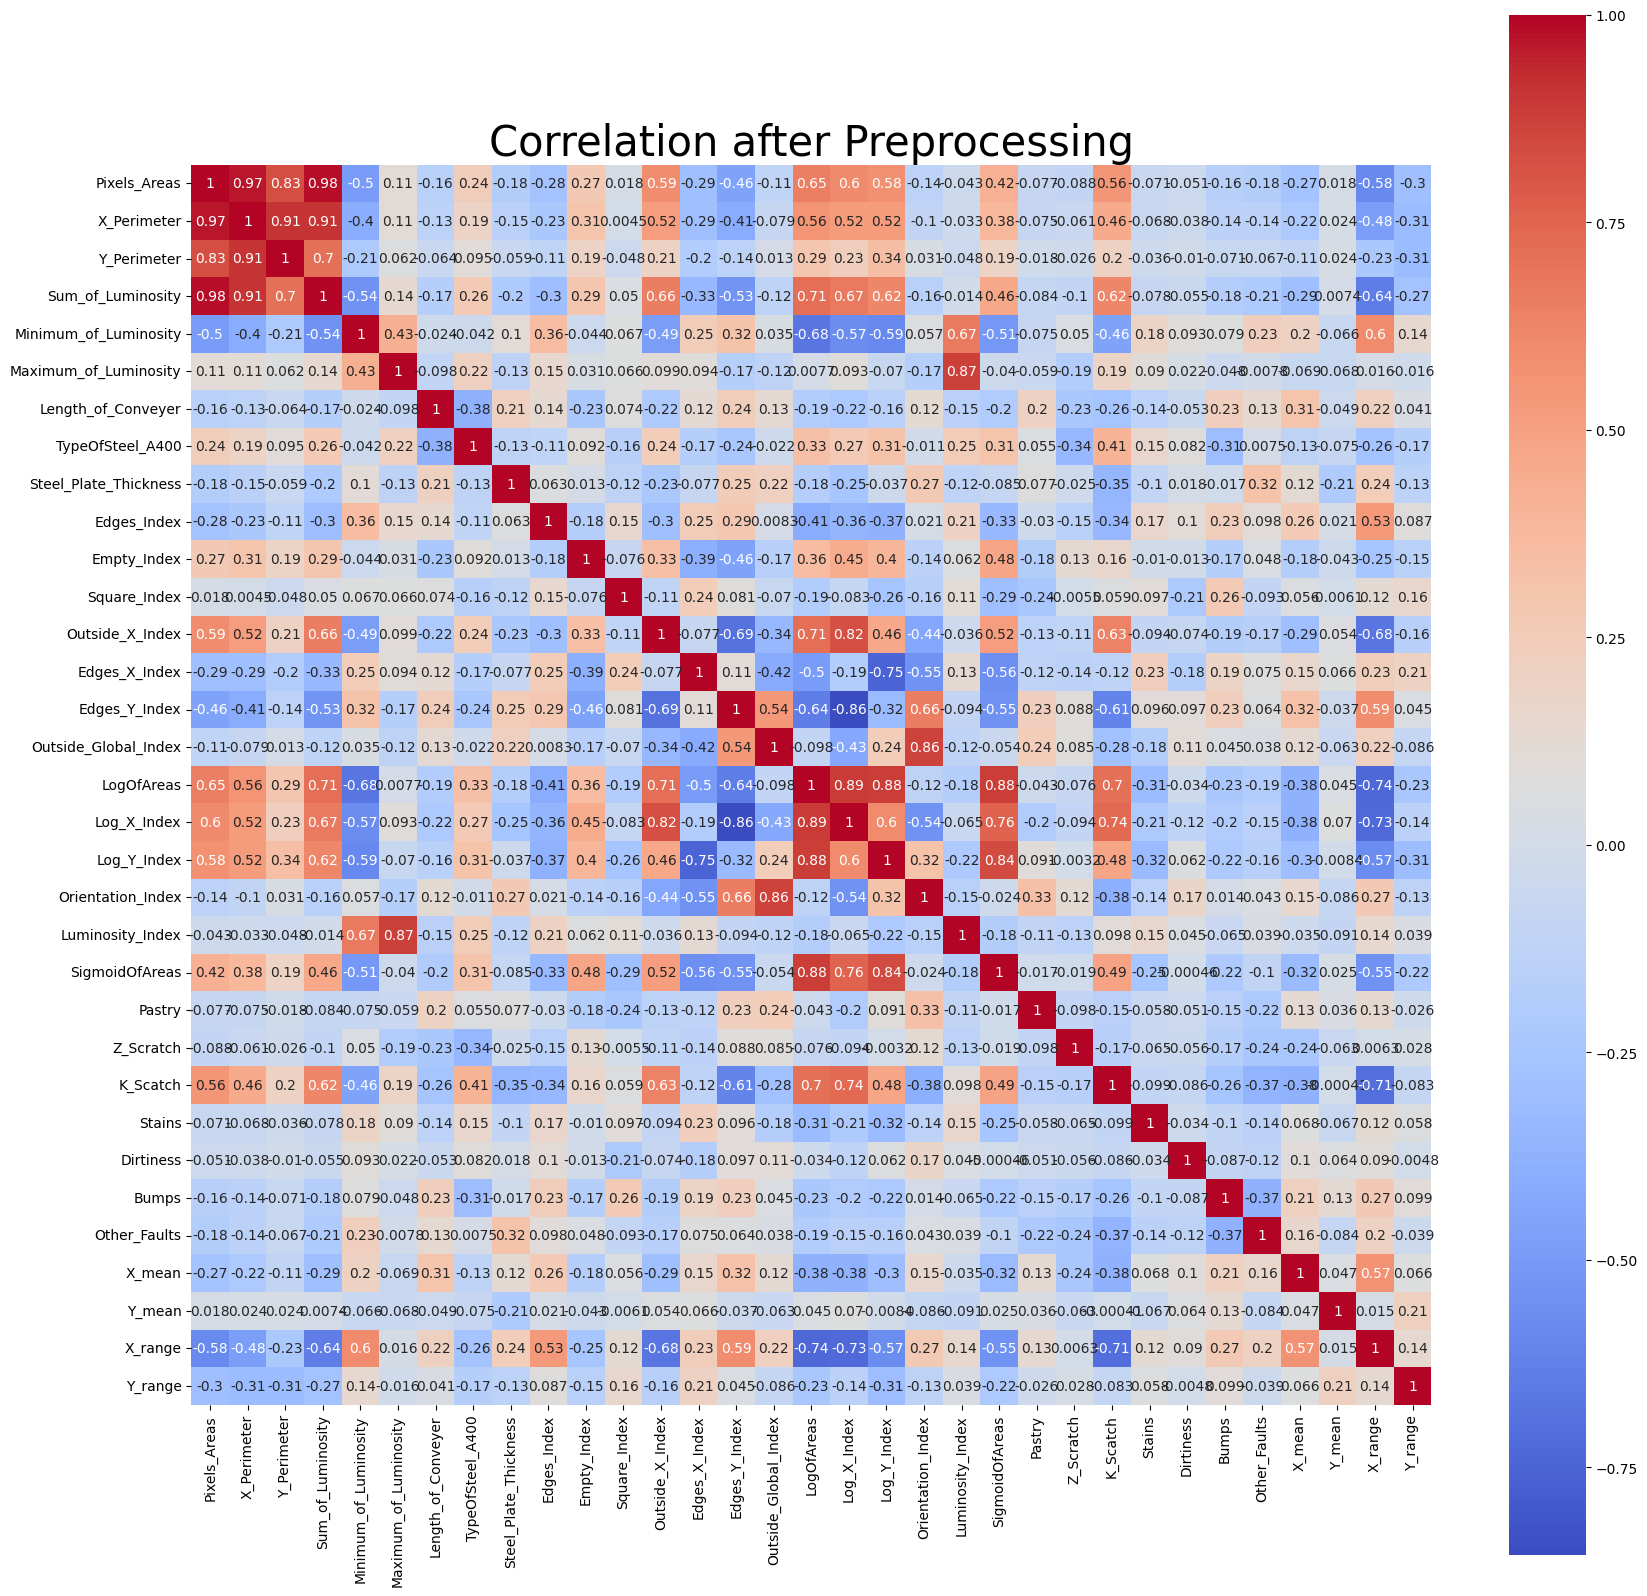

In [2]:

data.isnull().sum() # no missing values

plt.figure(figsize=(20, 20))
plt.title('Correlation before Preprocessing', fontsize = 30)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', cbar=True, square=True)
plt.show()

data['X_mean'] = (data['X_Minimum'] + data['X_Maximum']) / 2
data['Y_mean'] = (data['Y_Minimum'] + data['Y_Maximum']) / 2
data['X_range'] = (data['X_Minimum'] - data['X_Maximum']) / data['X_mean']
data['Y_range'] = (data['Y_Minimum'] - data['Y_Maximum']) / data['Y_mean']
data.drop(columns=['TypeOfSteel_A300', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum'], inplace=True)
plt.figure(figsize=(20, 20))
plt.title('Correlation after Preprocessing', fontsize = 30)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', cbar=True, square=True)
plt.show()
data['Class'] = data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].idxmax(1)
data.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], inplace=True)

(c) (5%) After data preprocessing, based on the prepared dataset, use the classification and regression tree (CART) to analyze the prepared dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

* Hyperparameters of CART:
  * max_depth=9
  * min_samples_split=27m

|    |   fit_time |   score_time |   test_accuracy |   test_roc_auc_ovr |   test_f1_micro |
|---:|-----------:|-------------:|----------------:|-------------------:|----------------:|
|  0 |  0.0502644 |   0.00807333 |        0.45641  |           0.778946 |        0.45641  |
|  1 |  0.0479693 |   0.0080297  |        0.716495 |           0.83284  |        0.716495 |
|  2 |  0.0550723 |   0.008008   |        0.541237 |           0.887343 |        0.541237 |
|  3 |  0.0512764 |   0.00999618 |        0.639175 |           0.841487 |        0.639175 |
|  4 |  0.0496716 |   0.00799894 |        0.505155 |           0.848203 |        0.505155 |
|  5 |  0.0540152 |   0.00800037 |        0.582474 |           0.888918 |        0.582474 |
|  6 |  0.0529988 |   0.00999904 |        0.685567 |           0.920694 |        0.685567 |
|  7 |  0.0525146 |   0.0090003  |        0.726804 |           0.920822 |        0.726804 |
|  8 |  0.0529995 |   0.00700092 |        0.494845 |           0.902196 |        0.494845 |
|  9 |  0.0527313 |   0.00900674 |        0.556701 |           0.687926 |        0.556701 |

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

data_x = data.loc[:, data.columns != 'Class']
data_y = data['Class']

model = DecisionTreeClassifier(max_depth=9, min_samples_split=27)
scores = cross_validate(model, data_x, data_y, cv=10, scoring=('accuracy', 'roc_auc_ovr', 'f1_micro'))

def avr(x):
    return sum(x) / len(x)
print(avr(scores['test_accuracy']), avr(scores['test_roc_auc_ovr']), avr(scores['test_f1_micro']))


0.5915199577055248 0.8536515241876351 0.5915199577055248


(d) (5%) Suggest a method to address the data imbalance issue. Build a new balanced dataset. (hint: undersampling or oversampling)

Use imlearn package to import Near Miss Undersampling, while the method I use is "Majority class examples with minimum average distance to three closest minority class examples".

In [4]:
import imblearn
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1)
bal_x, bal_y = undersample.fit_resample(data_x, data_y)


(e) (5%) Based on the balanced dataset, use the classification and regression tree (CART) to analyze the balanced dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

* Hyperparameters of CART:
  * max_depth=7
  * min_samples_split=25

|    |   fit_time |   score_time |   test_accuracy |   test_roc_auc_ovr |   test_f1_micro |
|---:|-----------:|-------------:|----------------:|-------------------:|----------------:|
|  0 | 0.0165098  |   0.00858521 |        0.717949 |           0.868054 |        0.717949 |
|  1 | 0.0162735  |   0.00700498 |        0.769231 |           0.87709  |        0.769231 |
|  2 | 0.00968313 |   0.00657845 |        0.564103 |           0.847683 |        0.564103 |
|  3 | 0.0160925  |   0.00791597 |        0.666667 |           0.870278 |        0.666667 |
|  4 | 0.00800014 |   0.00799966 |        0.74359  |           0.916166 |        0.74359  |
|  5 | 0.00800085 |   0.00799918 |        0.736842 |           0.91896  |        0.736842 |
|  6 | 0.016011   |   0.00798607 |        0.842105 |           0.959727 |        0.842105 |
|  7 | 0.00800323 |   0.00799823 |        0.842105 |           0.937534 |        0.842105 |
|  8 | 0.0160017  |   0.00800848 |        0.789474 |           0.943987 |        0.789474 |
|  9 | 0.00798845 |   0.0160005  |        0.815789 |           0.933015 |        0.815789 |

In [5]:
model = DecisionTreeClassifier(max_depth=7, min_samples_split=25)
bal_scores = cross_validate(model, bal_x, bal_y, cv=10, scoring=('accuracy', 'roc_auc_ovr', 'f1_micro'))

(f) (5%) Give a comparison between (c) and (e). Any suggestion or insight?

The "prepared dataset" is significantly imbalanced, leading to overfitting on certain training folds. The "balanced dataset" after undersampling results in training a better overall model without overfitting issue.

(g) (5%) Use “Random Forest” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

For prepared dataset, Random Forest model does not improve the performance much comparing to CART. But for balanced dataset, it improves a lot by fitting it into Random Forest. A balanced dataset are more likely to acheive higher feasibility in different random state. Besides from performance, its training efficiency also increased significantly (reduced roughly 70% of time), due to less samples after underfitting.

Prepared dataset:
* Hyperparameters of Random Forest:
  * max_depth=7
  * min_samples_split=25

|    |   fit_time |   score_time |   test_accuracy |   test_roc_auc_ovr |   test_f1_micro |
|---:|-----------:|-------------:|----------------:|-------------------:|----------------:|
|  0 |   0.930523 |    0.0291448 |        0.476923 |           0.804555 |        0.476923 |
|  1 |   0.967804 |    0.0240827 |        0.716495 |           0.945626 |        0.716495 |
|  2 |   0.994527 |    0.0252149 |        0.489691 |           0.888683 |        0.489691 |
|  3 |   0.936761 |    0.0243795 |        0.649485 |           0.904586 |        0.649485 |
|  4 |   0.956621 |    0.0177591 |        0.64433  |           0.907906 |        0.64433  |
|  5 |   0.957804 |    0.0160813 |        0.587629 |           0.88965  |        0.587629 |
|  6 |   0.957247 |    0.0256846 |        0.731959 |           0.926415 |        0.731959 |
|  7 |   0.922012 |    0.0238264 |        0.737113 |           0.952092 |        0.737113 |
|  8 |   1.00772  |    0.0172977 |        0.634021 |           0.938404 |        0.634021 |
|  9 |   0.95536  |    0.0160058 |        0.592784 |           0.837092 |        0.592784 |

Balanced dataset:
* No additional Hyperparameters of Random Forest

|    |   fit_time |   score_time |   test_accuracy |   test_roc_auc_ovr |   test_f1_micro |
|---:|-----------:|-------------:|----------------:|-------------------:|----------------:|
|  0 |   0.291687 |    0.0160072 |        0.666667 |           0.942569 |        0.666667 |
|  1 |   0.286062 |    0.0245056 |        0.794872 |           0.932183 |        0.794872 |
|  2 |   0.279644 |    0.023752  |        0.820513 |           0.976441 |        0.820513 |
|  3 |   0.277963 |    0.0207012 |        0.846154 |           0.963424 |        0.846154 |
|  4 |   0.322167 |    0.0239997 |        0.794872 |           0.969909 |        0.794872 |
|  5 |   0.304034 |    0.0164847 |        0.763158 |           0.934585 |        0.763158 |
|  6 |   0.304006 |    0.024606  |        0.894737 |           0.991518 |        0.894737 |
|  7 |   0.287461 |    0.0169592 |        0.894737 |           0.968764 |        0.894737 |
|  8 |   0.307669 |    0.0161641 |        0.842105 |           0.976339 |        0.842105 |
|  9 |   0.293931 |    0.0245423 |        0.710526 |           0.970326 |        0.710526 |

In [6]:
from sklearn.ensemble import RandomForestClassifier

# prepared dataset
model = RandomForestClassifier(max_depth=9, min_samples_split=27)
scores = cross_validate(model, data_x, data_y, cv=10, scoring=('accuracy', 'roc_auc_ovr', 'f1_micro'))

# balaned dataset
model = RandomForestClassifier()
bal_scores = cross_validate(model, bal_x, bal_y, cv=10, scoring=('accuracy', 'roc_auc_ovr', 'f1_micro'))

(h) (5%) Use “Gradient Boosting Decision Tree (GBDT)” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight

The balanced dataset also improves the performance a lot in using the GBDT model as the Random Forest model did. But the balanced dataset improves the training efficiency more (reduced up to 90% time). The result implies that the sample num increases GBDT training time significantly.

Prepared dataset:

|    |   fit_time |   score_time |   test_accuracy |   test_roc_auc_ovr |   test_f1_micro |
|---:|-----------:|-------------:|----------------:|-------------------:|----------------:|
|  0 |    27.7761 |   0.0487523  |        0.497436 |           0.802356 |        0.497436 |
|  1 |    37.0345 |   0.0399592  |        0.670103 |           0.930282 |        0.670103 |
|  2 |    45.9873 |   0.0398364  |        0.520619 |           0.89089  |        0.520619 |
|  3 |    39.0748 |   0.0418594  |        0.670103 |           0.910219 |        0.670103 |
|  4 |    38.4939 |   0.0408568  |        0.695876 |           0.907127 |        0.695876 |
|  5 |    48.5071 |   0.0409379  |        0.587629 |           0.891235 |        0.587629 |
|  6 |    21.9736 |   0.0132005  |        0.773196 |           0.941301 |        0.773196 |
|  7 |    35.1309 |   0.01652    |        0.737113 |           0.959057 |        0.737113 |
|  8 |    16.5713 |   0.00808501 |        0.618557 |           0.937846 |        0.618557 |
|  9 |    16.5036 |   0.0159249  |        0.628866 |           0.821731 |        0.628866 |

Balanced dataset:

|    |   fit_time |   score_time |   test_accuracy |   test_roc_auc_ovr |   test_f1_micro |
|---:|-----------:|-------------:|----------------:|-------------------:|----------------:|
|  0 |    4.30198 |   0.00824642 |        0.641026 |           0.930193 |        0.641026 |
|  1 |    4.24922 |   0.00844693 |        0.769231 |           0.93498  |        0.769231 |
|  2 |    4.25328 |   0.0162177  |        0.794872 |           0.94868  |        0.794872 |
|  3 |    4.24151 |   0.0160885  |        0.794872 |           0.951082 |        0.794872 |
|  4 |    4.29585 |   0.00861716 |        0.871795 |           0.978847 |        0.871795 |
|  5 |    4.23032 |   0.00792933 |        0.763158 |           0.947267 |        0.763158 |
|  6 |    4.21367 |   0.016001   |        0.842105 |           0.987622 |        0.842105 |
|  7 |    4.23138 |   0.0160041  |        0.894737 |           0.9699   |        0.894737 |
|  8 |    4.25179 |   0.00800967 |        0.842105 |           0.963839 |        0.842105 |
|  9 |    4.2533  |   0.00973129 |        0.736842 |           0.97174  |        0.736842 |

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# prepared dataset
model = GradientBoostingClassifier()
scores = cross_validate(model, data_x, data_y, cv=10, scoring=('accuracy', 'roc_auc_ovr', 'f1_micro'))

# balaned dataset
model = GradientBoostingClassifier()
bal_scores = cross_validate(model, bal_x, bal_y, cv=10, scoring=('accuracy', 'roc_auc_ovr', 'f1_micro'))

# 2. Feature Selection and Regularization- Ridge, Lasso, and Elastic Net

Data Source: a flotation plant in a mining process

https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process and are attached in the file MDS_Assignment3_Mining.zip.

Dataset provided by EduardoMagalhãesOliveira. Data collection methodology is shown as follows.

Hardware sensors, like temperature, pH, flow, density and all continuous process variables, where data were collected every 20s with no transformation (the dataset here shows raw data). Quality variables, like % of silica content, % of iron ore content and so on are quality measurements made by laboratory analysis. A sample of the iron ore pulp is collected in the
field/shop floor, every 15 minutes. Those samples are sent to lab for analysis. So, on every two
hours, lab give a feedback of quality analysis, in other words, only every two hours you have a
lab/quality measurement of the product stream (iron ore concentrate), which gives you a sense
of the quality of the product (iron ore pulp concentrate).

The main goal is to use this data to predict how much impurity is in the ore concentrate. As this
impurity is measured every hour, if we can predict how much silica (impurity) is in the ore
concentrate, we can help the engineers, giving them early information to take actions
(empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity,
if it is the case) and also help the environment (reducing the amount of ore that goes to tailings
as you reduce silica in the ore concentrate).

## Content

The first column shows time and date range (from march of 2017 until september of 2017).
Some columns were sampled every 20 second. Others were sampled on a hourly base.
The second and third columns are quality measures of the iron ore pulp right before it is fed into
the flotation plant. Column 4 until column 8 are the most important variables that impact in the
ore quality in the end of the process. From column 9 until column 22, we can see process data
(level and air flow inside the flotation columns, which also impact in ore quality. The last two
columns are the final iron ore pulp quality measurement from the lab.)

Target is to predict the last column, which is the % of silica in the iron ore concentrate.

## Inspiration

Is it possible to predict % Silica Concentrate every minute?

How many steps (hours) ahead can we predict % Silica in Concentrate? This would help
engineers to act in predictive and optimized way, mitigating the % of iron that could have gone
to tailings.

Also, for the Amina Flow, Ore Pulp Flow, and Flotation Column, etc. data are the “commas” in
those cells supposed to be “decimals” as shown in the csv file. For example, given the column
“% Silica Concentrate”=”1,31”, it means that the concentrate is 1.31%.

According to the description mentioned above, if the factor “% Silica Concentrate” is
regarded as the response variable (y) and all factors (except the date and % Iron Concentrate)
are independent variables, how to identify the importance variable which significantly affects
the “% Silica Concentrate” (y)?

## Questions

(a) (5%) Identify the important variable by linear regression with ordinary least squares (OLS)
(i.e. ranked by p-value). Identify the important variable by stepwise regression. (hint: you
can select forward selection, backward elimination, or both)

Linear Regression (OLS): Ranked important variables are shown below, resulted in low R-squared(0.023) and influenced by collinearity.

| Variable                     |      p-value |
|:-----------------------------|-------------:|
| Flotation Column 03 Air Flow | 0            |
| Flotation Column 03 Level    | 0            |
| Flotation Column 06 Air Flow | 4.95701e-200 |
| Flotation Column 05 Air Flow | 1.05914e-139 |
| Ore Pulp pH                  | 1.96472e-101 |
| Flotation Column 04 Level    | 6.62629e-100 |
| Ore Pulp Flow                | 3.54601e-94  |
| Flotation Column 04 Air Flow | 2.56486e-86  |
| Starch Flow                  | 5.56344e-68  |
| Flotation Column 07 Air Flow | 9.80908e-51  |
| Flotation Column 01 Air Flow | 1.20653e-42  |
| Amina Flow                   | 1.15434e-31  |
| Flotation Column 01 Level    | 1.7032e-22   |
| Flotation Column 02 Level    | 1.74766e-20  |
| Flotation Column 07 Level    | 5.60645e-15  |
| Flotation Column 02 Air Flow | 1.28001e-10  |
| Flotation Column 05 Level    | 6.01838e-08  |
| Flotation Column 06 Level    | 0.00647916   |
| const                        | 0.00663494   |
| Ore Pulp Density             | 0.0645006    |
| % Silica Feed                | 0.356558     |
| % Iron Feed                  | 0.630777     |

Stepwise Regression: Use forward selection to choose 10 variables.

* top 10 variables: `('const', 'Starch Flow', 'Amina Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 03 Level')`
* R-squared: -0.05935763531916578

In [8]:
import statsmodels.api as sm
# preprocessing
Mining = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
Mining.replace(',', '.', regex=True, inplace=True)
Mining['date'] = pd.to_datetime(Mining['date'])
Mining = Mining.astype(float, errors='ignore')

C:\Users\brian\AppData\Local\Temp\ipykernel_23508\2281696472.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Mining = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")


In [9]:
# OLS
x = Mining.loc[:, ~Mining.columns.isin(['date','% Iron Concentrate', '% Silica Concentrate'])]
y = Mining['% Silica Concentrate']
x = sm.add_constant(x) # adding a constant
model = sm.OLS(y, x).fit()
p_value_index = model.pvalues.index
sorted_pvalue = model.pvalues
sorted_pvalue, p_value_index = zip(*sorted(zip(sorted_pvalue, p_value_index)))
print(model.summary())
# print(pd.DataFrame({'Variable': p_value_index, 'p-value': sorted_pvalue}).to_markdown())

                             OLS Regression Results                             
Dep. Variable:     % Silica Concentrate   R-squared:                       0.023
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     879.8
Date:                  Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                          16:19:19   Log-Likelihood:            -1.8039e+07
No. Observations:                737453   AIC:                         3.608e+07
Df Residuals:                    737432   BIC:                         3.608e+07
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import linear_model
sfs = SequentialFeatureSelector(linear_model.LinearRegression(),forward=True, scoring='r2', k_features=10)
selected_features = sfs.fit(x, y)
print(selected_features.k_feature_names_)
print(selected_features.k_score_)

('const', 'Starch Flow', 'Amina Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 03 Level')
-0.05935763531916578


(b) (5%) Give a comparison between (a) and (b). The results are consistant?

First we conduct a ols using only top 10 variables, resulting in 0.022 R-squared. Comparing to Stepwise Regression, it performs slightly better, but both of them are underperformed due to collinearity. The important variables are also not consistant, since one evaluate the model considering all columns and another improves it step by step.

In [11]:
ols_x = Mining[['Flotation Column 03 Air Flow', 'Flotation Column 03 Level', 'Flotation Column 06 Air Flow', 'Flotation Column 05 Air Flow', 'Ore Pulp pH', 'Flotation Column 04 Level', 'Ore Pulp Flow', 'Flotation Column 04 Air Flow', 'Starch Flow', 'Flotation Column 07 Air Flow']]
ols_x = sm.add_constant(ols_x)
model = sm.OLS(y, ols_x).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     % Silica Concentrate   R-squared:                       0.022
Model:                              OLS   Adj. R-squared:                  0.022
Method:                   Least Squares   F-statistic:                     1683.
Date:                  Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                          16:21:43   Log-Likelihood:            -1.8040e+07
No. Observations:                737453   AIC:                         3.608e+07
Df Residuals:                    737442   BIC:                         3.608e+07
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

(c) (5%) From a methodology aspect, what’s the difference between Ridge regression and
Lasso? Why does Lasso support the variables selection rather than ridge? (hint: answer with
description or formulation. No computation needed.)

Lasso tends to reduce one of the variable to zero first, while Ridge would only reduce every variable to zero when lambda is infinite. From the geometric point of view, Lasso represent a square area while Ridge would plot a round area.

(d) (5%) What’s the benefit to use the Elastic Net? (hint: answer with description or
formulation. No computation needed.)

It combined Lasso and Ridge, which results in that highly correlated covariates tend to have similar regression
coefficients.

(e) (5%) Identify the important variable by ridge regression, lasso, and elastic net.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import numpy as np

x = Mining.loc[:, ~Mining.columns.isin(['date', '% Silica Concentrate'])]

clf = Ridge(alpha=10)
clf.fit(x, y)
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(x, y)
ranking, feature_name = zip(*(sorted(zip(rfe.ranking_, clf.feature_names_in_))))
output = pd.DataFrame({'Ridge Variables': feature_name, 'Ridge Importance Ranking': ranking})
print('Ridge Performance', clf.score(x, y))



clf = linear_model.Lasso(alpha=10)
clf.fit(x, y)
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(x, y)
ranking, feature_name = zip(*(sorted(zip(rfe.ranking_, clf.feature_names_in_))))
output['Lasso Variables'] =  feature_name
output['Lasso Importance Ranking'] =  ranking
print('Lasso Performance', clf.score(x, y))


clf = ElasticNet(random_state=0)
clf.fit(x, y)
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(x, y)
ranking, feature_name = zip(*(sorted(zip(rfe.ranking_, clf.feature_names_in_))))
output['Elastic Net Variables'] =  feature_name
output['Elastic Net Importance Ranking'] =  ranking
print('Elastic Net Performance', clf.score(x, y))

print(output.to_markdown())

(f) (5%) Give a comparison in (e). The results are consistent? If no, what’s the difference?
|Importance Ranking| Ridge Variables              | Lasso Variables              | Elastic Net Variables        |
|---:|:-----------------------------|:-----------------------------|:-----------------------------|
|  0 | % Iron Feed                  | % Iron Feed                  | % Iron Feed                  |
|  1 | % Silica Feed                | % Silica Feed                | % Silica Feed                |
|  2 | Ore Pulp Density             | Ore Pulp Density             | Ore Pulp Density             |
|  3 | % Iron Concentrate           | % Iron Concentrate           | % Iron Concentrate           |
|  4 | Ore Pulp pH                  | Ore Pulp pH                  | Ore Pulp pH                  |
|  5 | Flotation Column 03 Air Flow | Flotation Column 03 Air Flow | Flotation Column 03 Air Flow |
|  6 | Flotation Column 06 Air Flow | Flotation Column 06 Air Flow | Flotation Column 06 Air Flow |
|  7 | Flotation Column 02 Air Flow | Flotation Column 02 Air Flow | Flotation Column 02 Air Flow |
|  8 | Flotation Column 07 Air Flow | Flotation Column 07 Air Flow | Flotation Column 07 Air Flow |
|  9 | Flotation Column 07 Level    | Flotation Column 07 Level    | Flotation Column 07 Level    |
| 10 | Flotation Column 04 Level    | Flotation Column 04 Level    | Flotation Column 04 Level    |
| 11 | Flotation Column 06 Level    | Flotation Column 06 Level    | Flotation Column 06 Level    |
| 12 | Flotation Column 05 Air Flow | Flotation Column 05 Air Flow | Flotation Column 05 Air Flow |
| 13 | Flotation Column 01 Level    | Flotation Column 01 Level    | Flotation Column 01 Level    |
| 14 | Flotation Column 04 Air Flow | Flotation Column 04 Air Flow | Flotation Column 01 Air Flow |
| 15 | Flotation Column 01 Air Flow | Flotation Column 01 Air Flow | Flotation Column 04 Air Flow |
| 16 | Flotation Column 05 Level    | Flotation Column 05 Level    | Flotation Column 05 Level    |
| 17 | Flotation Column 02 Level    | Flotation Column 02 Level    | Flotation Column 02 Level    |
| 18 | Amina Flow                   | Amina Flow                   | Amina Flow                   |
| 19 | Starch Flow                  | Starch Flow                  | Starch Flow                  |
| 20 | Ore Pulp Flow                | Ore Pulp Flow                | Ore Pulp Flow                |
| 21 | Flotation Column 03 Level    | Flotation Column 03 Level    | Flotation Column 03 Level    |

(The Ranking is Ranked by RFE)

The result is consistent, expect for a few low-ranking variables of Elactic Net, but the order of the rest are identical.

(g) (5%) What is “adaptive elastic net”? Why we need it? How to build it? Please simply
describe or formulate it. (No computation needed.)

Used weighted L1 penalty, which can give larger penalty to the near-zero-coefficient variables (increase penalty over iteration). In this case, the model can result in a smaller bias.

(h) (5%) Which columns are highly-correlated? Show the table of the coefficient estimation by using linear regression. Any multicollinearity problem?

```
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Silica Concentrate   R-squared:                       0.023
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     879.8
Date:                  Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                          16:19:19   Log-Likelihood:            -1.8039e+07
No. Observations:                737453   AIC:                         3.608e+07
Df Residuals:                    737432   BIC:                         3.608e+07
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          1.82e+09    6.7e+08      2.715      0.007    5.06e+08    3.13e+09
% Iron Feed                   4.798e+06   9.98e+06      0.481      0.631   -1.48e+07    2.44e+07
% Silica Feed                 6.901e+06   7.48e+06      0.922      0.357   -7.77e+06    2.16e+07
Starch Flow                  -4.541e-05   2.61e-06    -17.424      0.000   -5.05e-05   -4.03e-05
Amina Flow                      -0.0002   2.06e-05    -11.709      0.000      -0.000      -0.000
Ore Pulp Flow                   -0.0002   9.35e-06    -20.591      0.000      -0.000      -0.000
Ore Pulp pH                      0.0206      0.001     21.385      0.000       0.019       0.022
Ore Pulp Density                -0.0067      0.004     -1.849      0.065      -0.014       0.000
Flotation Column 01 Air Flow    -0.0013   9.65e-05    -13.688      0.000      -0.002      -0.001
Flotation Column 02 Air Flow    -0.0005   7.68e-05     -6.430      0.000      -0.001      -0.000
Flotation Column 03 Air Flow     0.0046   8.65e-05     52.965      0.000       0.004       0.005
Flotation Column 04 Air Flow     0.0004   1.83e-05     19.694      0.000       0.000       0.000
Flotation Column 05 Air Flow     0.0005   1.86e-05     25.167      0.000       0.000       0.001
Flotation Column 06 Air Flow    -0.0022   7.37e-05    -30.185      0.000      -0.002      -0.002
Flotation Column 07 Air Flow    -0.0008    5.4e-05    -14.982      0.000      -0.001      -0.001
Flotation Column 01 Level     8.893e-05   9.11e-06      9.758      0.000    7.11e-05       0.000
Flotation Column 02 Level    -7.673e-05   8.27e-06     -9.277      0.000   -9.29e-05   -6.05e-05
Flotation Column 03 Level        0.0004   7.06e-06     53.935      0.000       0.000       0.000
Flotation Column 04 Level       -0.0004   1.92e-05    -21.220      0.000      -0.000      -0.000
Flotation Column 05 Level       -0.0001   1.87e-05     -5.418      0.000      -0.000   -6.46e-05
Flotation Column 06 Level    -4.803e-05   1.76e-05     -2.722      0.006   -8.26e-05   -1.35e-05
Flotation Column 07 Level        0.0002   2.08e-05      7.813      0.000       0.000       0.000
==============================================================================
Omnibus:                   526353.496   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5629779.048
Skew:                           3.552   Prob(JB):                         0.00
Kurtosis:                      14.521   Cond. No.                     3.06e+14
==============================================================================
```

By observing the table, the Durbin-Watson Statistic is only 0.175, implying autocorrelation. We therfore construct the Correlation Coeffient Table, resulting in `'% Iron Feed'` and `'% Silica Feed'` is highly negatively correlated.

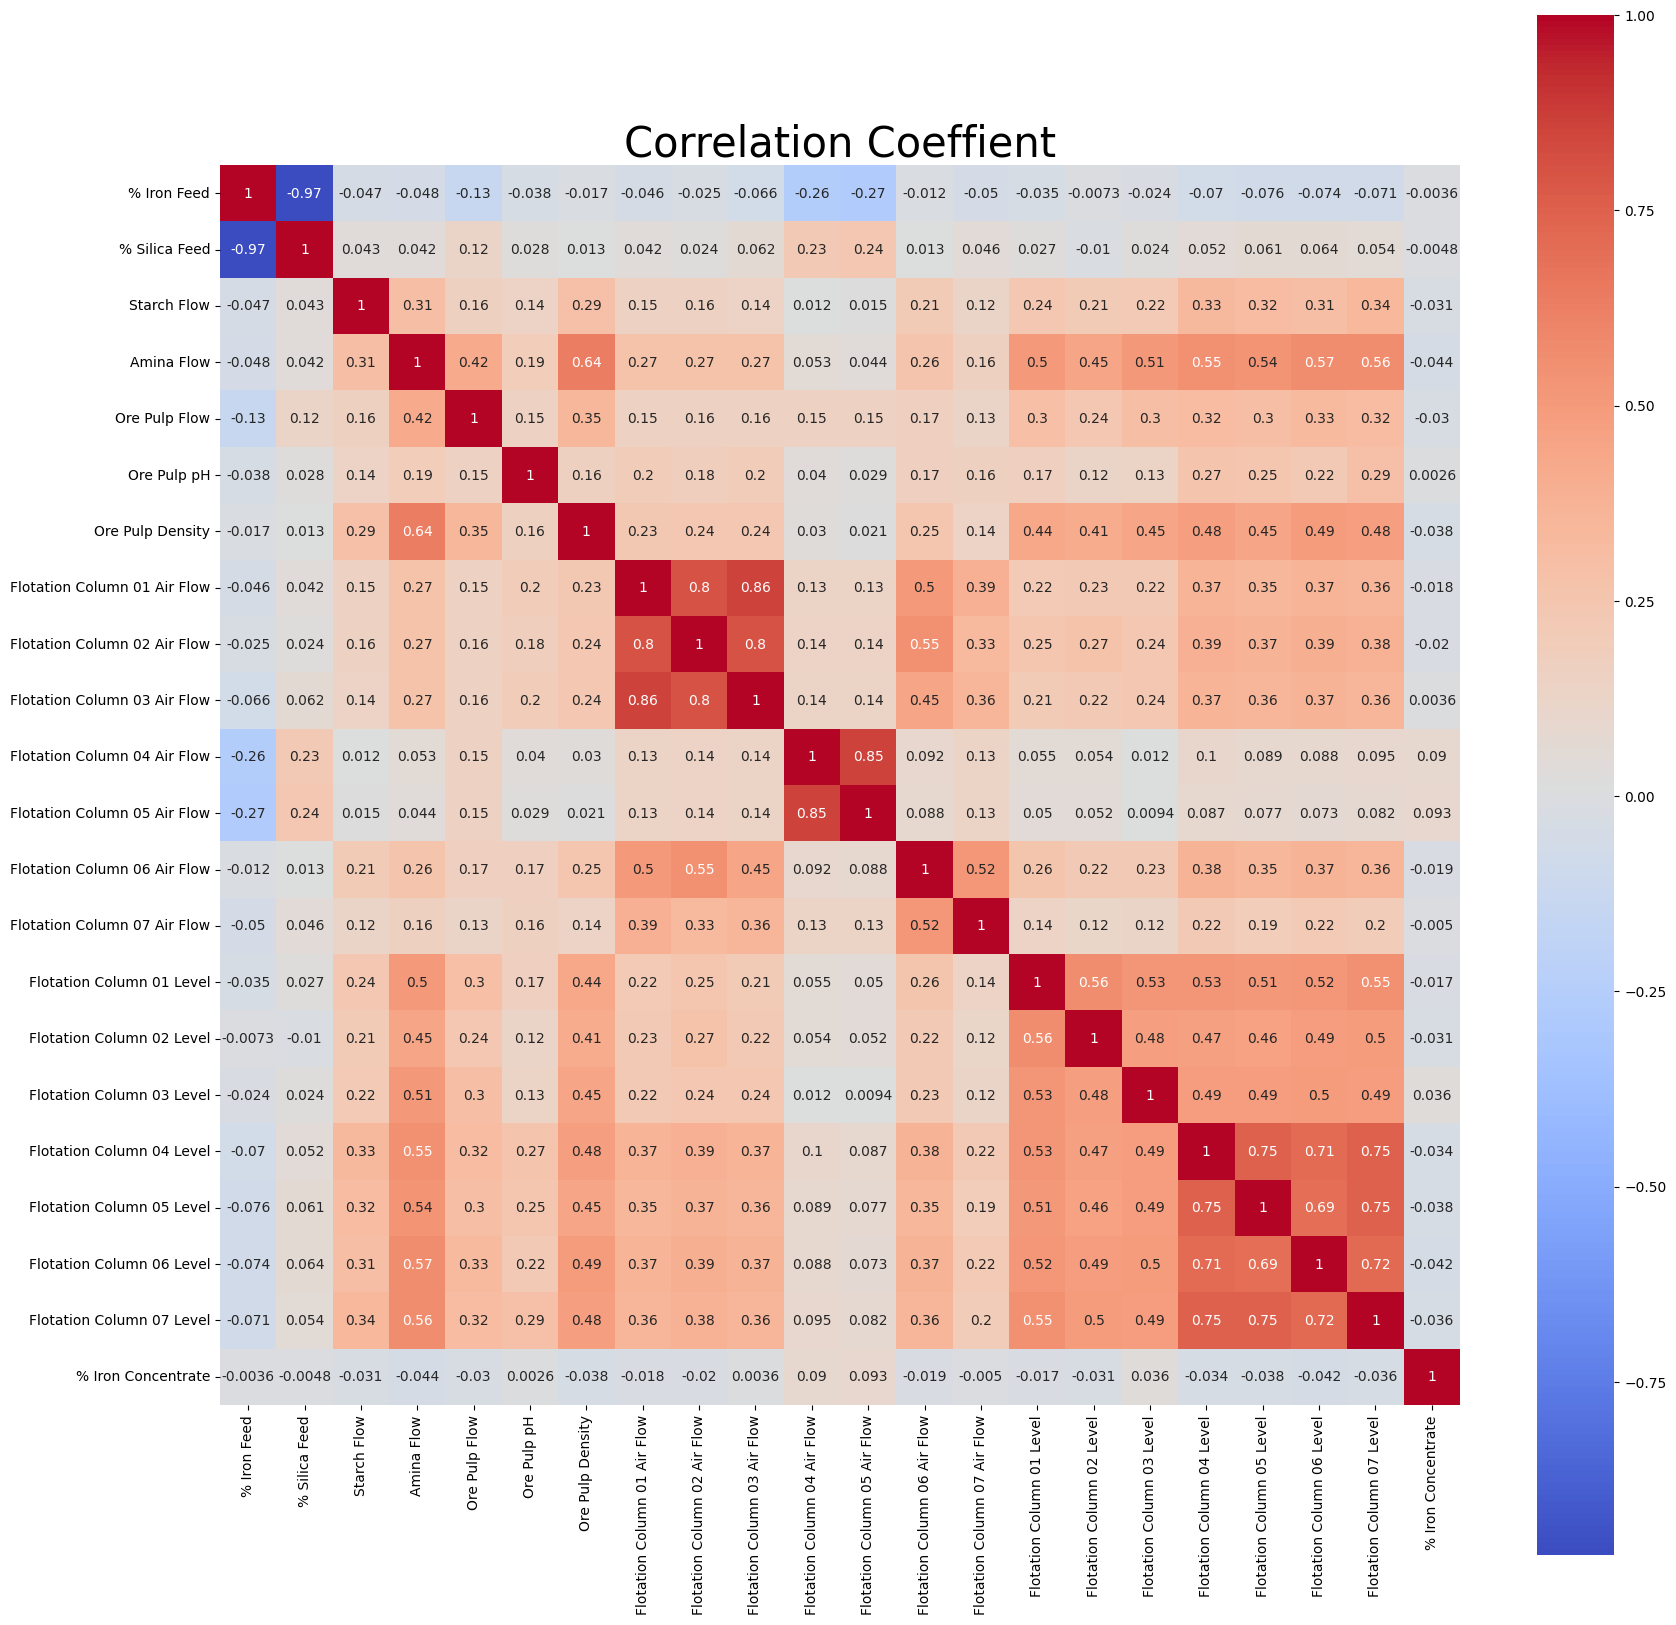

In [57]:
plt.figure(figsize=(20, 20))
plt.title('Correlation Coeffient', fontsize = 30)
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', cbar=True, square=True)
plt.show()

(i) (5%) Is it possible to predict % Silica in Concentrate with using % Iron Concentrate column
(as they are highly correlated)? Why? What’s the potential issue? How to address it?

The potential issue of high correlation is collineartiy, resulting in a tendacy to create singular matrices and other negative impact to the model.

But Yes, it is possible if we use embedded methods like Lasso or Elastic Net. It considered the interaction and non-linear relationship between variables.

# 3. Deep Learning

Use Python to build up long short-term memory (LSTM), which is one type of recurrent neural network (RNN). Collect the dataset related to weekly raw material price OR consumption (i.e. demand). Build a price/demand forecast. Don’t use STOCK PRICE for prediction. You may read the tutorial: https://www.datacamp.com/community/tutorials/lstm-python-stock-market. Note that, you only have price/demand data as response variable Y and it should be a time-rolling prediction, that is, for example, use the past 8 weeks dataset for 8-week ahead prediction. Thus, the prediction should be like the following diagram.

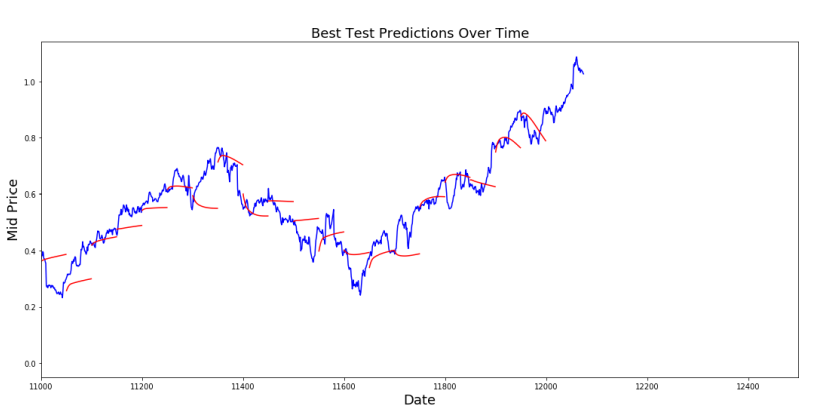

Dataset could be found as follows.

eg. Brent oil price: https://www.investing.com/commodities/brent-oil-historical-data

Commodity prices: https://fred.stlouisfed.org/categories/32217

Commodity prices: https://sdw.ecb.europa.eu/browse.do?node=9691219

The summary table of raw materials, https://just2.entrust.com.tw/z/ze/zeq/zeq.djhtm

Pick one raw material and collect its dataset. The collection period should be as long as possible (eg. from 2000 to 2022) to guarantee the sufficient samples for LSTM training.

(a) (10%) Prepare and transform the data to appropriate format (eg. use Data Generator in https://www.datacamp.com/community/tutorials/lstm-python-stock-market). Build LSTM model and show the prediction results via Time-series (Nested) Cross Validation.

## Data Preprocessing

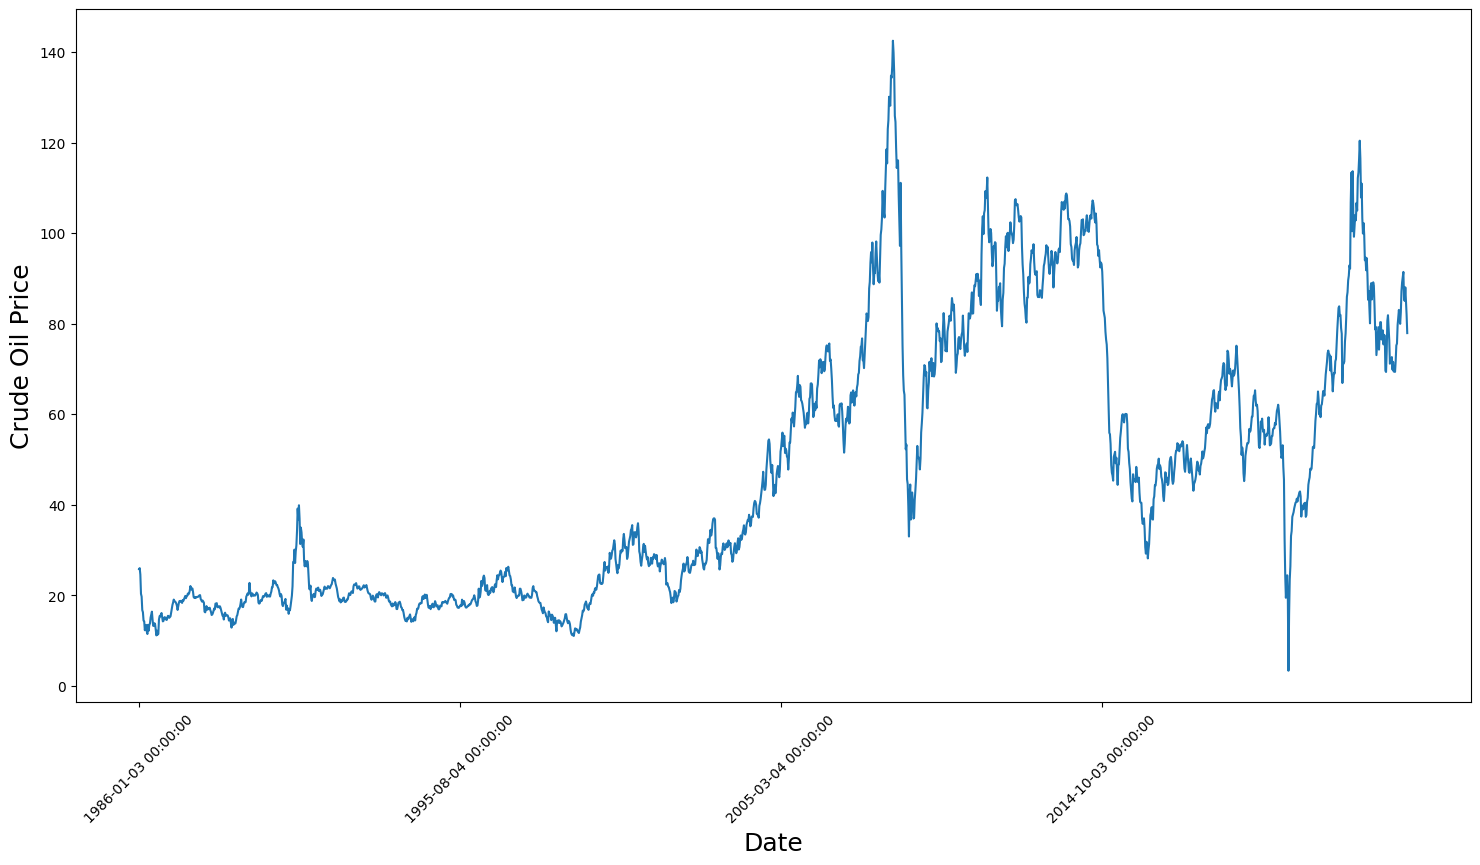

In [143]:
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf

data = pd.read_csv('WCOILWTICO.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data = data[~(data['WCOILWTICO'] == '.')]
data['WCOILWTICO'] = data['WCOILWTICO'].astype(float)

plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['WCOILWTICO']))
plt.xticks(range(0,data.shape[0],500),data['DATE'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Crude Oil Price',fontsize=18)
plt.show()

In [144]:
data = data.loc[:, 'WCOILWTICO'].values

train_data = data[:1000]
test_data = data[1000:]

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)


# smoothing_window_size = 250
# for di in range(0,1000,smoothing_window_size):
    # scaler.fit(train_data[di:di+smoothing_window_size,:])
    # train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
scaler.fit(train_data)
train_data = scaler.transform(train_data)
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

EMA = 0.0
gamma = 0.1
for ti in range(1000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_data = np.concatenate([train_data,test_data],axis=0)

## Construting LSTM Models

In [145]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))


## Defining

In [157]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 20 # Number of time steps you look into the future.
batch_size = 50 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.compat.v1.reset_default_graph() # This is important in case you run this multiple times

train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.compat.v1.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.compat.v1.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

lstm_cells = [
    tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.compat.v1.keras.initializers.VarianceScaling(scale=1.0, mode="fan_avg", distribution="uniform")
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.compat.v1.nn.rnn_cell.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(lstm_cells)

w = tf.compat.v1.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.compat.v1.keras.initializers.VarianceScaling(scale=1.0, mode="fan_avg", distribution="uniform"))
b = tf.compat.v1.get_variable('b',initializer=tf.random.uniform([1],-0.1,0.1))

C:\Users\brian\AppData\Local\Temp\ipykernel_23508\2173629294.py:18: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],


## Calculate

In [158]:

c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.compat.v1.nn.rnn_cell.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.compat.v1.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.compat.v1.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.compat.v1.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.compat.v1.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.compat.v1.assign(global_step,global_step + 1)
tf_learning_rate = tf.compat.v1.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.compat.v1.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.compat.v1.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

print('Defining prediction related TF functions')

sample_inputs = tf.compat.v1.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.compat.v1.nn.rnn_cell.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.compat.v1.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.compat.v1.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.compat.v1.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.compat.v1.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.compat.v1.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.compat.v1.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done


## Running

In [162]:

epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 10 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.compat.v1.InteractiveSession()

tf.compat.v1.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(1000,1900,10).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.ndarray.item(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

Initialized
Average loss at step 1: 0.312746
	Test MSE: 0.12276
	Finished Predictions
Average loss at step 2: 0.079958
	Test MSE: 0.09500
	Finished Predictions
Average loss at step 3: 0.066293
	Test MSE: 0.11424
	Finished Predictions
Average loss at step 4: 0.053728
	Test MSE: 0.08252
	Finished Predictions
Average loss at step 5: 0.058111
	Test MSE: 0.05507
	Finished Predictions
Average loss at step 6: 0.045936
	Test MSE: 0.03943
	Finished Predictions
Average loss at step 7: 0.046387
	Test MSE: 0.03547
	Finished Predictions
Average loss at step 8: 0.040482
	Test MSE: 0.03550
	Finished Predictions
Average loss at step 9: 0.038979
	Test MSE: 0.03291
	Finished Predictions
Average loss at step 10: 0.038068
	Test MSE: 0.04252
	Finished Predictions
Average loss at step 11: 0.031806
	Test MSE: 0.08082
	Finished Predictions
Average loss at step 12: 0.038799
	Decreasing learning rate by 0.5
	Test MSE: 0.20770
	Finished Predictions
Average loss at step 13: 0.030651
	Test MSE: 0.24428
	Finished P


(b) (5%) Visualize the time-rolling prediction as above diagram.

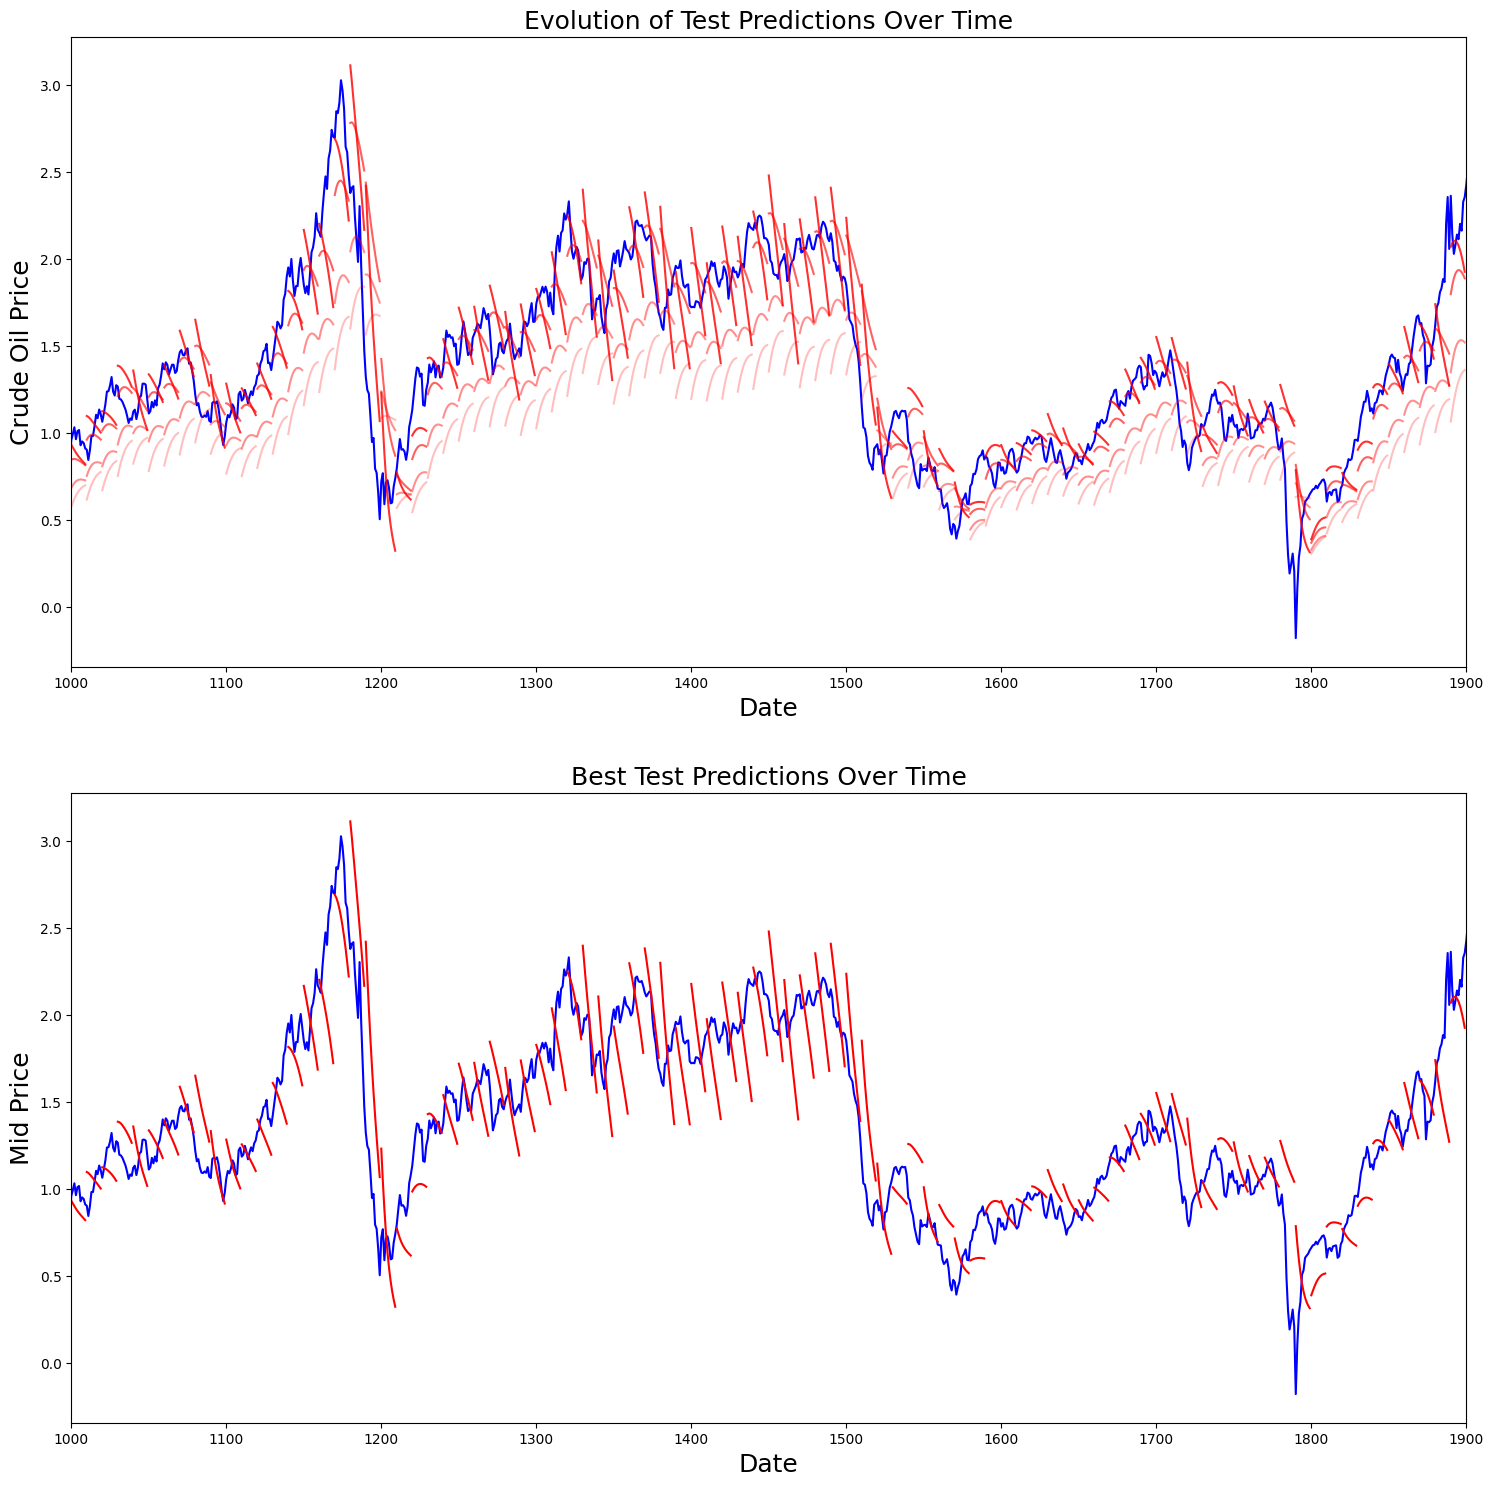

In [161]:
best_prediction_epoch = 9 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(data.shape[0]),all_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Crude Oil Price',fontsize=18)
plt.xlim(1000,1900)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(data.shape[0]),all_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(1000,1900)
plt.show()